In [1]:
# Introduction to Network Analysis using NetworkX for Cellular and Systems Modelling
# Fall 2024
# Caitlin Strassburg

import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations


# NetworkX


### Introduction
**NetworkX** is a Python library used for the creation, manipulation, and study of complex networks and graphs. 

It supports both unweighted and weighted, directed and undirected graphs, and provides extensive capabilities for working with network data structures, algorithms, and visualizations.


### Key Features:
- **Graph Creation**: Create various types of graphs (e.g., undirected, directed, multigraphs).
- **Graph Manipulation**: Add/remove nodes and edges, assign weights/attributes.
- **Algorithms**: Implement graph theory algorithms like shortest paths, clustering, and centrality measures.
- **Visualization**: Basic drawing capabilities using Matplotlib.




For our purposes, we will be using networkx to investigate unweighted, directed graphs representing regulatory interactions. The following classes, functions, and methods may be useful: 

### Classes

| Class          | Description                                                   |
|----------------|---------------------------------------------------------------|
| `Graph()`      | Creates an undirected graph.                                   |
| `DiGraph()`    | Creates a directed graph.                                      |


### Functions and Methods

#### 1. Graph Creation and Manipulation
| Method                                      | Description                                                 |
|---------------------------------------------|-------------------------------------------------------------|
| `add_node(n)`                               | Adds a single node `n`.                                      |
| `add_nodes_from([n1, n2, ...])`             | Adds multiple nodes.                                         |
| `add_edge(u, v)`                            | Adds an edge between nodes `u` and `v`.                      |
| `add_edges_from([(u1, v1), (u2, v2), ...])` | Adds multiple edges.                                         |
| `remove_node(n)`                            | Removes a node.                                              |
| `remove_edge(u, v)`                         | Removes an edge between `u` and `v`.                         |
| `neighbors(n)`                              | Returns the neighbors of node `n`.                           |
| `degree(n)`                                 | Returns the degree (number of connections) of node `n`.       |
| `subgraph(n_1, ..., n_n)`                                 | Returns the subgraph defined by nodes n_1, ..., n_n.       |
| `to_undirected()`                                 | Returns an undirected view of the graph.       |


### 2. Investigating Subgraph Structures

| **Method**                                  | **Description**                                                   | **Example Usage**                                        |
|---------------------------------------------|-------------------------------------------------------------------|----------------------------------------------------------|
| `nx.find_cliques(G)`                        | Finds all maximal cliques in the graph.                           | `cliques = list(nx.find_cliques(G))`                     |
| `[clique for clique in cliques if len(clique) == k]` | Filters cliques by size `k`.                                       | `k_cliques = [clique for clique in cliques if len(clique) == k]` |
| `nx.is_isomorphic(G1, G2)` | Determines if G1 and G2 are isomorphic; returns a boolean value.   | `if nx.is_isomorphic(subgraph, motif):`             |


#### 3. Visualization
| Method         | Description               |
|----------------|---------------------------|
| `draw(G)`      | Visualizes the graph (uses Matplotlib). |
| `draw_networkx(G)`      | Visualizes the graph with more customizable parameters (uses Matplotlib). |





# Creating a Graph

### From a CSV File
For consistency with the data used in homework 3, the file we are working with, 'recitation_graph.csv' has two columns where the first is the interaction target, and the second is the interaction source. **When adding edges to a graph you use add_edge(source, target)**. 

In [2]:
def get_graph(file_name):
    G = nx.DiGraph()
    with open(file_name, 'r') as file:
        for line in file:
            values = line.strip().split()
            target, source = map(int, values)
            G.add_edge(source,target)

    print(f'G is a Digraph with {len(G.nodes())} nodes and {len(G.edges())} edges.')
    return(G)


G is a Digraph with 10 nodes and 15 edges.


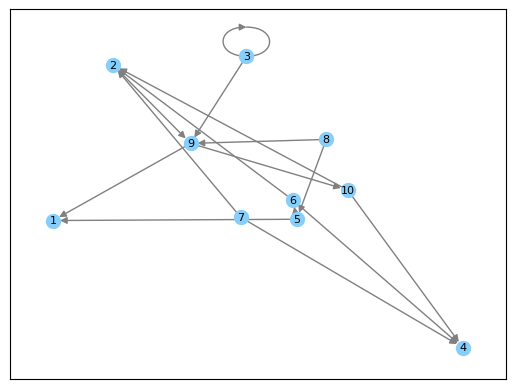

In [3]:
filename = 'baby_recitation_graph.csv'

baby_G = get_graph(filename)
nx.draw_networkx(baby_G, node_size=100, node_color='lightskyblue', edge_color='gray', font_size=8)


### From Scratch

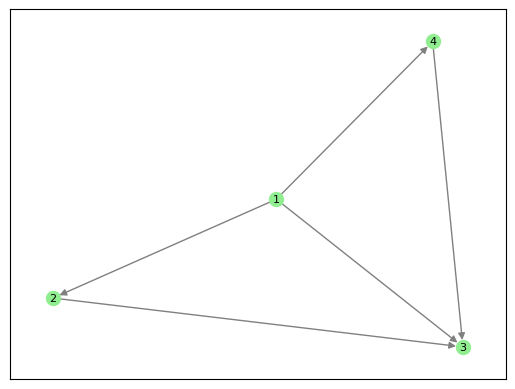

In [4]:
G1 = nx.DiGraph()

nodes = [1,2,3,4]
edges = [(1,2),(2,3),(1,3),(1,4),(4,3)]

G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

nx.draw_networkx(G1, node_size=100, node_color='lightgreen', edge_color='gray', font_size=8)


# Finding Subgraphs

### Isomorphisms

Isomorphisms are graphs with equivalent structure. The nodes can have different names and locations, but their relationships are preserved. Note that if graph A is a non-spanning subgraph of graph B, they will not be isomorphic, because not all their respective relationships are preserved. Searching for subgraph isomorphisms is a nontrivial problem in graph theory, but thankfully we are working with relatively small graphs and a small set of subgraphs (motifs).

Also to our benefit, **NetworkX** has a built in function for assessing if two graphs are isomorphic! Passing two graphs G1, G2 to the function `nx.is_isomorphic(G1, G2)` will return a Boolean True/False. Note that `nx.is_isomorphic(G1, G2)` will consider autoregulatory loops when finding isomorphisms, so if those are extraneous to the motif you are looking for, remove them from the graph.

See below an example of checking for subgraphs of G1 which are isomorphic to the FFL motif.


In [5]:
# Define the motif graph structure
FFL = nx.DiGraph()
FFL.add_edges_from([(1,2),(2,3),(1,3)])
motif = FFL

# Make a copy of the original graph so we don't modify its structure, and remove the autoregulatory loops.
graph = G1.copy()
graph.remove_edges_from(nx.selfloop_edges(graph))

# Retrieve the set of all possible trios of nodes in the graph, to check whether they are isomorphic to the motif.
trios = list(combinations(graph.nodes(), 3))

# Initiate an empty list to store the subgraphs that are isomorphic to the FFL motif.
FFLs = []

# For each set of three nodes,
for trio in trios:
    # Retrieve their subgraph
    subgraph = graph.subgraph(trio)
    # Check if the subgraph is isomorphic to the motif
    if nx.is_isomorphic(subgraph, motif):
        # If it is, add it to the list of FFLs
        FFLs.append(trio)

print(f'There are {len(FFLs)} FFLs in G: {FFLs}')

There are 2 FFLs in G: [(1, 2, 3), (1, 3, 4)]


### Another Example:
What 3 node motif is represented in the following graph?


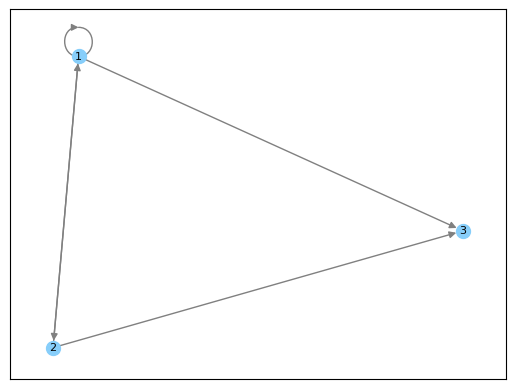

In [6]:
G2 = nx.DiGraph()

nodes = [1,2,3]
edges = [(1,1),(1,2),(2,1),(1,3),(2,3)]

G2.add_nodes_from(nodes)
G2.add_edges_from(edges)

nx.draw_networkx(G2, node_size=100, node_color='lightskyblue', edge_color='gray', font_size=8)


Write code to match and find this motif in G2.

The following graph has one instance of each motif. You can use this to check your work.

G is a Digraph with 39 nodes and 45 edges.


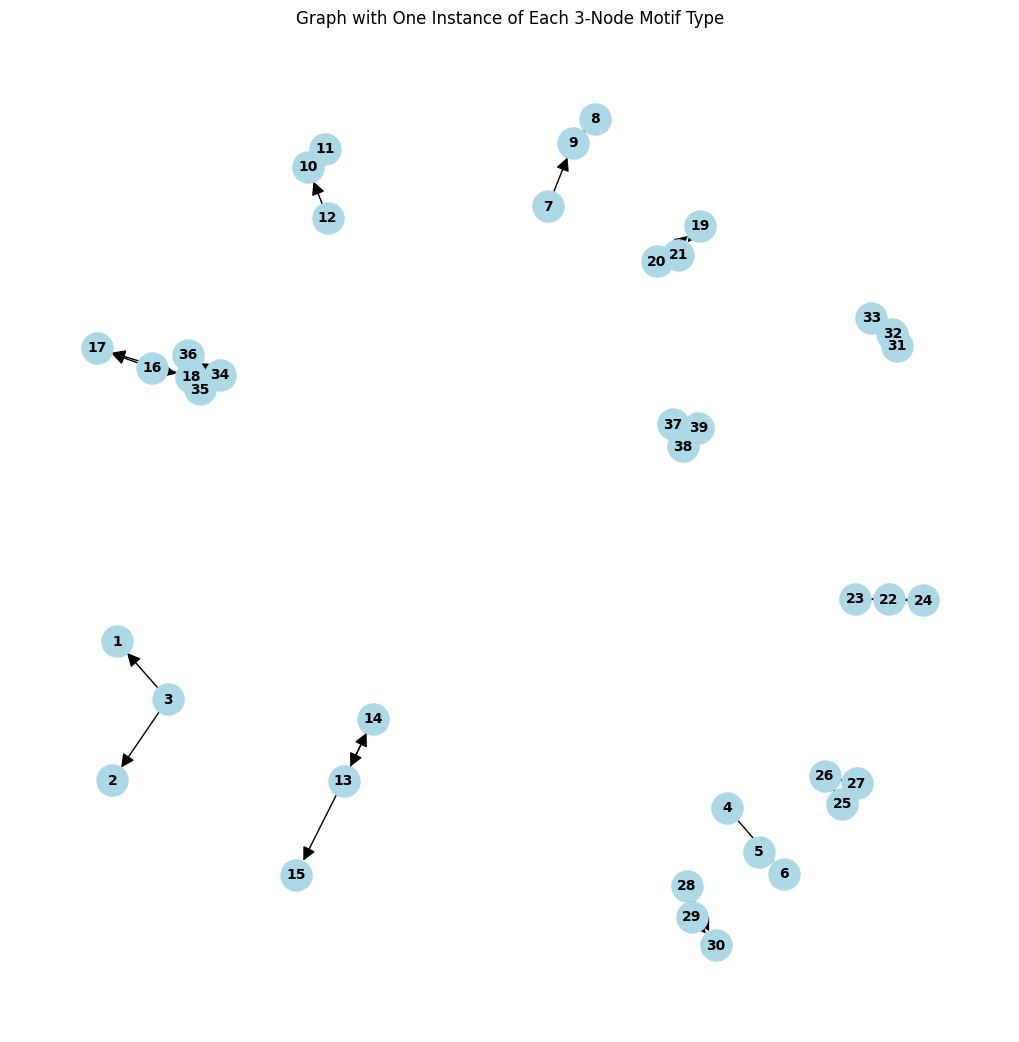

In [7]:
filename = 'motif_graph.csv'

motif_G = get_graph(filename)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(motif_G)  # Layout for positioning nodes
nx.draw(motif_G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Graph with One Instance of Each 3-Node Motif Type")
plt.show()

### Efficient Motif Finding
You may have noticed that searching for isomorphisms takes quite a bit of time! To improve efficiency, you can use other graph properties to limit the number of isomorphisms you check for. A graph's order is the number of nodes it contains, and size is the number of edges. Using `len(G.edges())` you can determine graph size. 

Assort the motifs by their size. What else can you use to make smaller classes of motifs to check subgraphs against? Consider the size of each motif if it were undirected.

Use a strategy that combines
1. Only classifying subgraphs that _can_ be 3-node motifs 
2. Sorting subgraphs into classes based on graph characteristics 
3. Using isomorphism to identify a subgraph's matching motif 

The following Erdős–Rényi graph contains 4 motif types with 2, 352, 377, and 725 occurences respectively.

**It should take your function absolutely no more than 10 minutes to identify the three node motif occurences in this graph.**

G is a Digraph with 408 nodes and 575 edges.


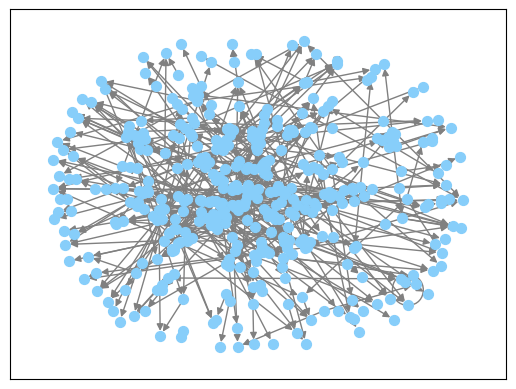

In [8]:
filename = 'practice_recitation_graph.csv'

practice_G = get_graph(filename)
nx.draw_networkx(practice_G, node_size=50, node_color='lightskyblue', edge_color='gray', with_labels=False)
